In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 2000x2000 with 2 Axes>

In [2]:
vehicle_objects = SG_1.vehicle_objects_dict

for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    print("score_array:     ", vehicle_objects[vehicle_dict_id].score_dict)
    print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")

vehicle object:   <Vehicle.Vehicle object at 0x7fb369424a50>
vehicle_info:     {'id': -1, 'initial_position': array([ 67.348 , 377.2854]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7fb33825cb90>, 'initial_lanelet_id': 59, 'initial_lanelet_node': 0, 'planning_problem_id': 1}
**vehicle_info.initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state.velocity:     22.699
vehicle_initial_state.position:     [ 67.348  377.2854]
vehicle_graph:    <GraphBasedDistanceMeasure.ScenarioGraph object at 0x7fb364db6fd0>
distance_sensor:  <Sensor.DistanceSensor object at 0x7fb337e67850>
distance_sensor.vehicles_in_range:  [321, 323, 324, 326, 327]
score_array:      {321: 0.0, 327: 0.0, 323: 255.47362022216595, 324: 255.47362022216595, 326: 255.47

In [3]:
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
print(visualization_function.group_ids)

{-1: 1, 35: 2, 311: 2, 39: 3, 313: 4, 315: 5, 317: 6, 318: 7, 319: 8, 320: 9, 321: 10, 322: 11, 323: 12, 324: 13, 326: 14, 327: 15, 328: 16, 329: 17, 330: 18, 331: 19}


In [4]:
import numpy as np
all_groups = list()
for v_o in SG_1.vehicle_objects_dict:
    print(np.sort(SG_1.vehicle_objects_dict[v_o].group_array))
    all_groups.append(SG_1.vehicle_objects_dict[v_o].group_array)

[ -1 323 324 326]
[ 35 311 315]
[39]
[ 35 311 315]
[313 317 320 322]
[ 35 311 315 317]
[313 315 317 320]
[318 319 320 322 324]
[318 319 321]
[313 317 318 320]
[319 321 322 323 324 326]
[313 318 321 322]
[ -1 321 323]
[ -1 318 321 324]
[ -1 321 326 327]
[326 327]
[328]
[329]
[330]
[331]


In [5]:
all_groups

[[323, 324, 326, -1],
 [311, 315, 35],
 [39],
 [35, 315, 311],
 [317, 320, 322, 313],
 [35, 311, 317, 315],
 [313, 315, 320, 317],
 [320, 319, 322, 324, 318],
 [318, 321, 319],
 [313, 317, 318, 320],
 [319, 322, 324, 323, 326, 321],
 [313, 318, 321, 322],
 [-1, 321, 323],
 [-1, 318, 321, 324],
 [-1, 321, 327, 326],
 [326, 327],
 [328],
 [329],
 [330],
 [331]]

#123456
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
#998822
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
<class 'commonroad.scenario.obstacle.DynamicObstacle'>
#880000
<class 'commonroad.scenario.obstacle.DynamicObstacle'>


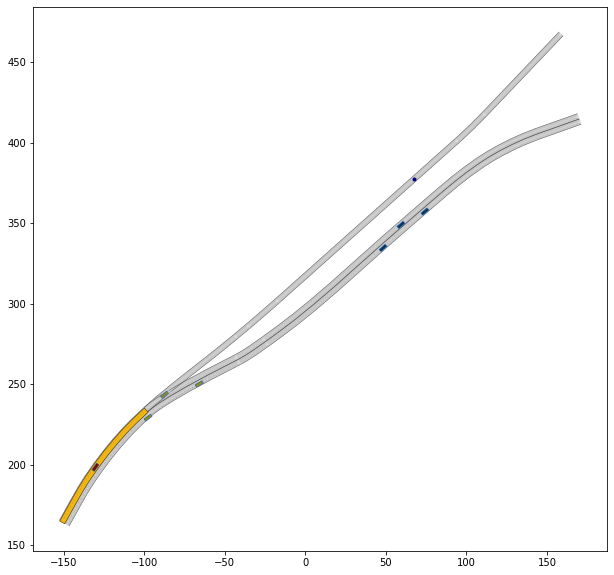

In [7]:
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
#print(visualization_function.group_ids)

import os
import matplotlib.pyplot as plt
from IPython import display
from brute_force import calculate_score
import commonroad.planning
# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
import scenarios 
import matplotlib.patches as patches
from brute_force import Colorize_groups
import Convert_groups

groups=[]
# calculate_scores
grouparray= [[323, 324, 326, -1], [311, 315, 35], [39]]

for group in grouparray:
    groups.append(Convert_groups.conv_to_obj(scenario, planning_problem_set, group))

print(grouparray)
# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step   
    
    ax = plt.gca()
    
    draw_object(scenario.lanelet_network,draw_params={'time_begin': i}) #, plot_limits=plot_limits)
    time = i
    Colorize_groups.colorize_groups(groups, ax, time)
    #raw_object(commonroad.planning.planning_problem.PlanningProblemSet.find_planning_problem_by_id(planning_problem_set, 2), draw_params=draw_params)
    #ect=patches.Rectangle((0,0),5,2,linewidth=1,edgecolor='#880000', facecolor='#998822')
    #x.add_patch(rect)
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()